#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone pruce: html tag (\<p class="h5 price">\)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [3]:
url = 'https://mobelix.com.mk/mk/mobilni-telefoni'

In [4]:
response = requests.get(url)
response

<Response [200]>

In [5]:
soup = BeautifulSoup(response.content, 'html.parser')

In [7]:
pagination_last_value = soup.find_all('a', class_='page-link')[-2].text

In [8]:
fetch_url = 'https://mobelix.com.mk/mk/mobilni-telefoni?page='

In [9]:
cards = []
for i in range(1, int(pagination_last_value)+1):
  html = requests.get(fetch_url + str(i))
  cards += soup.find_all('div',class_=['tab-col col-6 col-md-4 my-3 product-wrapper d-flex text-center wow fadeInUp','tab-col col-6 col-md-4 my-3 product-wrapper d-flex text-center onsale wow fadeInUp'])

In [10]:
cards

[<div class="tab-col col-6 col-md-4 my-3 product-wrapper d-flex text-center onsale wow fadeInUp">
 <div class="p-2 rounded text-dark bg-white d-flex w-100">
 <a class="d-flex w-100" href="https://mobelix.com.mk/mk/proizvodi/one-plus-12-5g-12gb-ram256gb">
 <div class="border border-0 bg-white rounded px-3 pb-3 pt-1 row mx-0 align-items-center">
 <div class="col-12 product-img-wrapper pt-3">
 <img alt="One Plus 12 5G 12GB RAM/256GB" class="img-fluid mb-2 mb-xl-3" src="https://mobelix.com.mk/storage/app/uploads/public/65f/2c2/278/thumb_5371_550_800_0_0_crop.png"/>
 </div>
 <div class="col-12">
 <h5 class="mb-0">One Plus</h5>
 <h3 class="h5 font-weight-normal">One Plus 12 5G 12GB RAM/256GB</h3>
 <p class="h5 price"><del class="mr-2 small">49,200.00</del><br/>46,100.00 ден</p>
 <button class="btn btn-outline-primary">Повеќе</button>
 </div>
 </div>
 <span class="badge badge-primary">-6%</span>
 </a>
 </div>
 </div>,
 <div class="tab-col col-6 col-md-4 my-3 product-wrapper d-flex text-center

In [ ]:
url = " https://mobelix.com.mk/mk/mobilni-telefoni"
response = requests.get(url)
s = BeautifulSoup(response.content,'html.parser')
pagination_last_value = s.find_all('a',class_='page-link')[-2].text
fetch_url = 'https://mobelix.com.mk/mk/mobilni-telefoni?page='
cards=[]
for i in range(1,int(pagination_last_value)+1):
  html = requests.get(fetch_url + str(i))
  #soup = BeautifulSoup(response.content,'html.parser')
  cards += s.find_all('div',class_=['tab-col col-6 col-md-4 my-3 product-wrapper d-flex text-center wow fadeInUp','tab-col col-6 col-md-4 my-3 product-wrapper d-flex text-center onsale wow fadeInUp'])

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [11]:
if response.status_code // 100 == 2:
    print("Request was successful")
else:
    print("Request was not successful")
    exit()

Request was successful


# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [12]:
raw_html = response.text
type(raw_html)

str

In [13]:
soup = BeautifulSoup(response.content,'html.parser')

**Print the HTML code that you get**

In [15]:
#soup

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [16]:
brand_names = [element.get_text() for element in soup.select("h2.h6.mb-0.brand-menu")]
brand_names

['Apple',
 'Samsung',
 'Huawei',
 'Xiaomi',
 'Blackberry',
 'One Plus',
 'Nokia',
 'Google',
 'ASUS',
 'ZTE']

In [17]:
# Phone type: html tag (<h3 class="h5 font-weight-normal">)
phone_type = [element.get_text() for element in soup.select("h3.h5.font-weight-normal")]
phone_type

['One Plus 12 5G 12GB RAM/256GB',
 'One Plus 12R 5G 16GB RAM/256GB',
 'One Plus 12 5G 16GB RAM/512GB',
 'Xiaomi 14 12/512GB',
 'Galaxy A05s 4/128GB',
 'Porsche Design P9981',
 'Galaxy A03s 4/64GB',
 'Galaxy A04s 3/32GB',
 'iPhone 13 Pro 1TB']

In [18]:
# Phone price: html tag (<p class="h5 price">)
phone_price = [element.get_text() for element in soup.select("p.h5.price")]
phone_price

['49,200.0046,100.00 ден',
 '36,800.0033,800.00 ден',
 '52,000.0049,200.00 ден',
 '46,100.00 ден',
 '10,500.009,200.00 ден',
 '19,000.00 ден',
 '9,200.008,300.00 ден',
 '10,500.008,300.00 ден',
 '83,000.0076,900.00 ден']

In [25]:
phone_price = []
for element in soup.select("p.h5.price"):
    br_tags = element.find_all('br')
    if br_tags:
        phone_price.append(br_tags[-1].next_sibling.strip())
    else:
        phone_price.append(element.get_text().strip())

phone_price


['46,100.00 ден',
 '33,800.00 ден',
 '49,200.00 ден',
 '46,100.00 ден',
 '9,200.00 ден',
 '19,000.00 ден',
 '8,300.00 ден',
 '8,300.00 ден',
 '76,900.00 ден']

In [26]:
all_phone_brands = []
all_phone_types = []
all_phone_prices = []

In [27]:
for i in range(1, int(pagination_last_value) + 1):
    html = requests.get(fetch_url + str(i))
    soup = BeautifulSoup(html.content, 'html.parser')

    brand_elements = soup.find_all('h5', class_='mb-0')
    type_elements = soup.find_all('h3', class_='h5 font-weight-normal')
    price_elements = soup.find_all('p', class_='h5 price')

    for brand, phone_type, price in zip(brand_elements, type_elements, price_elements):
        all_phone_brands.append(brand.text.strip())
        all_phone_types.append(phone_type.text.strip())
        price_text = price.text.split(".00")[0].strip()

        br_element = price.find('br')
        if br_element:
            price_text = br_element.next_sibling

        all_phone_prices.append(price_text)

In [28]:
for brand, phone_type, price in zip(all_phone_brands, all_phone_types, all_phone_prices):
    print(f"Phone Brand: {brand}, Phone Type: {phone_type}, Phone Price: {price}")

Phone Brand: One Plus, Phone Type: One Plus 12 5G 12GB RAM/256GB, Phone Price: 46,100.00 ден
Phone Brand: One Plus, Phone Type: One Plus 12R 5G 16GB RAM/256GB, Phone Price: 33,800.00 ден
Phone Brand: One Plus, Phone Type: One Plus 12 5G 16GB RAM/512GB, Phone Price: 49,200.00 ден
Phone Brand: Xiaomi, Phone Type: Xiaomi 14 12/512GB, Phone Price: 46,100
Phone Brand: Samsung, Phone Type: Galaxy A05s 4/128GB, Phone Price: 9,200.00 ден
Phone Brand: Blackberry, Phone Type: Porsche Design P9981, Phone Price: 19,000
Phone Brand: Samsung, Phone Type: Galaxy A03s 4/64GB, Phone Price: 8,300.00 ден
Phone Brand: Samsung, Phone Type: Galaxy A04s 3/32GB, Phone Price: 8,300.00 ден
Phone Brand: Apple, Phone Type: iPhone 13 Pro 1TB, Phone Price: 76,900.00 ден
Phone Brand: Apple, Phone Type: iPhone 13 128GB, Phone Price: 35,000.00 ден
Phone Brand: Apple, Phone Type: iPhone 13 Pro 128GB, Phone Price: 54,100.00 ден
Phone Brand: Apple, Phone Type: iPhone 13 Pro Max 128GB, Phone Price: 60,300.00 ден
Phone Bra

**Add as many codeboxes as you need for selecting all the html elements**

**Create lists with the extracted data from the html elements that you selected**

**Print all lists that are containing the elements**

In [33]:
print(all_phone_brands)
print(all_phone_types)
print(all_phone_prices)

['One Plus', 'One Plus', 'One Plus', 'Xiaomi', 'Samsung', 'Blackberry', 'Samsung', 'Samsung', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Samsung', 'Apple', 'Samsung', 'Huawei', 'Huawei', 'One Plus', 'Apple', 'Oppo', 'Oppo', 'Apple', 'Apple', 'Apple', 'Honor', 'Nokia', 'Google', 'Samsung', 'Samsung', 'Nothing', 'One Plus', 'Samsung', 'Xiaomi', 'Apple', 'Google', 'Xiaomi', 'Realme', 'Google', 'Xiaomi', 'Apple', 'Samsung', 'Samsung', 'Nothing', 'Apple', 'Samsung', 'Samsung', 'Apple', 'Samsung', 'Samsung', 'Nothing', 'Apple', 'Samsung', 'Xiaomi', 'Xiaomi', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Samsung', 'Honor', 'ASUS', 'Google', 'Apple', 'Google', 'Apple', 'Xiaomi', 'Xiaomi', 'Xiaomi', 'Xiaomi', 'Google', 'Google', 'Apple', 'Xiaomi', 'ASU

**Check if all lists are the same size**

In [34]:
if len(all_phone_brands) == len(all_phone_types) == len(all_phone_prices):
    print("All lists have the same length.")
else:
    print("Lists have different lengths.")

All lists have the same length.


# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [35]:
data = {
    'Phone Brand': all_phone_brands,
    'Phone Type': all_phone_types,
    'Phone Price': all_phone_prices
}

In [43]:
df = pd.DataFrame(list(zip(all_phone_brands,all_phone_types,all_phone_prices)),columns=['brand','type','price'])
df.head(15)

,brand,type,price
0,One Plus,One Plus 12 5G 12GB RAM/256GB,"46,100.00 ден"
1,One Plus,One Plus 12R 5G 16GB RAM/256GB,"33,800.00 ден"
2,One Plus,One Plus 12 5G 16GB RAM/512GB,"49,200.00 ден"
3,Xiaomi,Xiaomi 14 12/512GB,"46,100"
4,Samsung,Galaxy A05s 4/128GB,"9,200.00 ден"
5,Blackberry,Porsche Design P9981,"19,000"
6,Samsung,Galaxy A03s 4/64GB,"8,300.00 ден"
7,Samsung,Galaxy A04s 3/32GB,"8,300.00 ден"
8,Apple,iPhone 13 Pro 1TB,"76,900.00 ден"
9,Apple,iPhone 13 128GB,"35,000.00 ден"


In [ ]:
# The zip() function takes multiple iterable objects (in this case, lists)
#and returns an iterator that produces tuples containing elements
#from the input iterables, pairwise.
#So, it pairs up elements from all_phone_brands, all_phone_types, and all_phone_prices into tuples.

In [41]:
#df = pd.DataFrame(data)

**Print the dataset you obtain**

In [44]:
print(df)

        brand                                  type          price
0    One Plus         One Plus 12 5G 12GB RAM/256GB  46,100.00 ден
1    One Plus        One Plus 12R 5G 16GB RAM/256GB  33,800.00 ден
2    One Plus         One Plus 12 5G 16GB RAM/512GB  49,200.00 ден
3      Xiaomi                    Xiaomi 14 12/512GB         46,100
4     Samsung                   Galaxy A05s 4/128GB   9,200.00 ден
..        ...                                   ...            ...
181    Xiaomi  Redmi Note 13 Pro+ 5G 12GB RAM/512GB         26,400
182   Samsung     Galaxy Z Fold 5 5G 12GB RAM/512GB         70,700
183   Samsung                          Tab S9 Ultra         61,500
184   Samsung           Galaxy A34 5G 6GB RAM/128GB  12,900.00 ден
185  One Plus                 Nord 2 12GB RAM/256GB  30,700.00 ден

[186 rows x 3 columns]


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [45]:
df['price'] = df['price'].replace('[ден,]', '', regex=True).astype(float)


In [46]:
df

,brand,type,price
0,One Plus,One Plus 12 5G 12GB RAM/256GB,46100.0
1,One Plus,One Plus 12R 5G 16GB RAM/256GB,33800.0
2,One Plus,One Plus 12 5G 16GB RAM/512GB,49200.0
3,Xiaomi,Xiaomi 14 12/512GB,46100.0
4,Samsung,Galaxy A05s 4/128GB,9200.0
...,...,...,...
181,Xiaomi,Redmi Note 13 Pro+ 5G 12GB RAM/512GB,26400.0
182,Samsung,Galaxy Z Fold 5 5G 12GB RAM/512GB,70700.0
183,Samsung,Tab S9 Ultra,61500.0
184,Samsung,Galaxy A34 5G 6GB RAM/128GB,12900.0


In [47]:
mean_price = df['price'].mean()
median_price = df['price'].median()
std_deviation = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()

In [48]:
print("Mean Price: {:.2f}".format(mean_price))
print("Median Price: {:.2f}".format(median_price))
print("Standard Deviation: {:.2f}".format(std_deviation))
print("Minimum Price: {:.2f}".format(min_price))
print("Maximum Price: {:.2f}".format(max_price))

Mean Price: 38675.65
Median Price: 35900.00
Standard Deviation: 24906.78
Minimum Price: 4900.00
Maximum Price: 159900.00


# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values


Text(0, 0.5, 'Frequency')

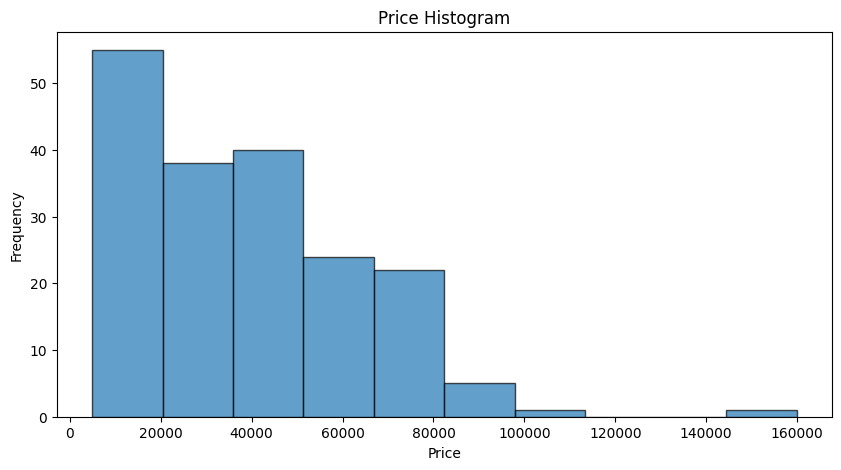

In [49]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=10, edgecolor='k', alpha=0.7)
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [50]:
plt.show()

In [51]:
plt.figure(figsize=(10, 5))
brands = df['brand']
prices = df['price']

<Figure size 1000x500 with 0 Axes>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'One Plus'),
  Text(1, 0, 'Xiaomi'),
  Text(2, 0, 'Samsung'),
  Text(3, 0, 'Blackberry'),
  Text(4, 0, 'Apple'),
  Text(5, 0, 'Huawei'),
  Text(6, 0, 'Oppo'),
  Text(7, 0, 'Honor'),
  Text(8, 0, 'Nokia'),
  Text(9, 0, 'Google'),
  Text(10, 0, 'Nothing'),
  Text(11, 0, 'Realme'),
  Text(12, 0, 'ASUS'),
  Text(13, 0, 'Vivo'),
  Text(14, 0, 'GoPro'),
  Text(15, 0, 'Motorola')])

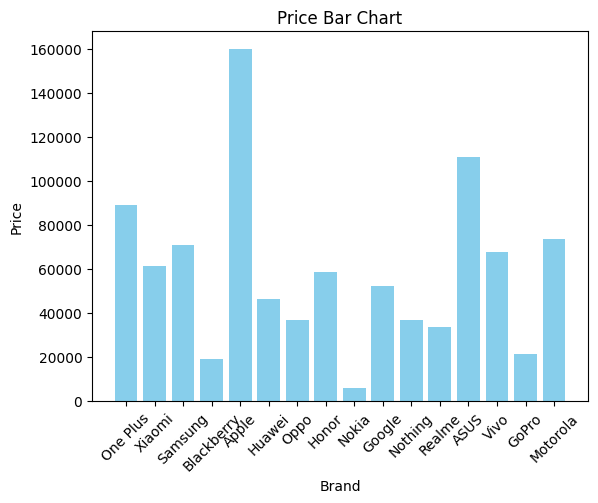

In [52]:
plt.bar(brands, prices, color='skyblue')
plt.title('Price Bar Chart')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=45)

In [53]:
plt.show()

In [54]:
#matrix = {'brand':all_phone_brands,'type':all_phone_types,'price':all_phone_prices}

In [56]:
#data = pd.DataFrame(matrix)
#data

In [57]:
df.to_csv('/content/drive/MyDrive/DataScience/Labs/lab1_data.csv', index=False)